In [4]:
!pip install nibabel

In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [7]:
brain_mri = nib.load("/content/drive/MyDrive/Medical_Imaging/03-Data-Formats/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz")
brain_mri_data = brain_mri.get_fdata()

In [8]:
affine = brain_mri.affine
shape = brain_mri.shape

In [9]:
affine

array([[ 1.89821944e-02, -2.72075552e-03,  1.19975281e+00,
        -9.06798553e+01],
       [-9.27821696e-01,  1.32986516e-01,  2.45456006e-02,
         1.02829445e+02],
       [ 1.33014351e-01,  9.28015888e-01,  5.71511449e-11,
        -1.14823784e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [10]:
shape

(256, 256, 150)

In [11]:
brain_mri.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [13]:
nib.aff2axcodes(affine) #different body axes Front to Back -P, From Bottom to Top - S, From Left to Right - R

('P', 'S', 'R')

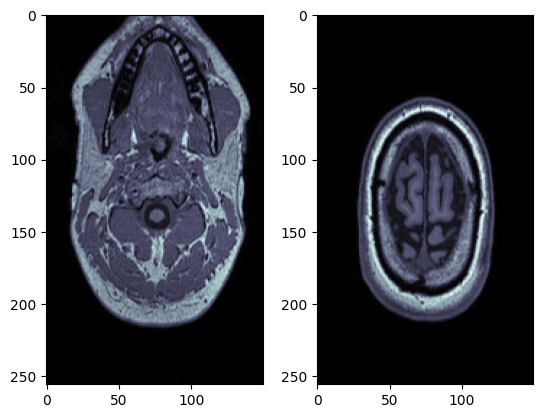

In [24]:
%matplotlib inline
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,30,:], cmap = 'bone') #slice of image
axis[1].imshow(brain_mri_data[:,200,:], cmap = 'bone')

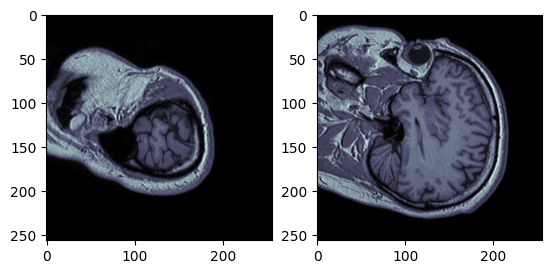

In [25]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,:,20], cmap = 'bone') #slice of image
axis[1].imshow(brain_mri_data[:,:,45], cmap = 'bone')

In [26]:
voxel_coords = np.array((0,0,0,1)) #translating voxel coords to physical
physical_coords = affine @ voxel_coords
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

**RESAMPLING**

In [28]:
import nibabel.processing

In [30]:
voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri,(128,128,100),voxel_size,orientation = 'PSR')
brain_mri_resized_data = brain_mri_resized.get_fdata()

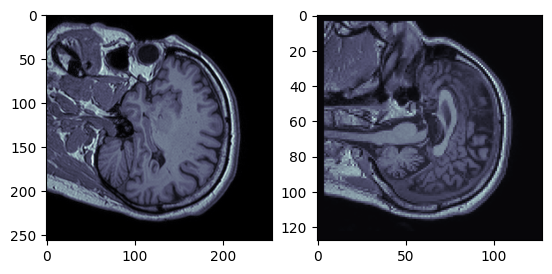

In [33]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:,:,50], cmap = 'bone')
axis[1].imshow(brain_mri_resized_data[:,:,50], cmap = 'bone')

**NORMALIZATION** AND **STANDARTIZATION**